In [6]:
import importlib

# # First, import module objects
import AbstractCircuit
import DShor
import help_function
import FundamentalOperations
import AbstractRegister
from random import getrandbits
import QPU
import matplotlib.pyplot as plt

# Then reload the modules (if you're updating code dynamically)
importlib.reload(AbstractRegister)
importlib.reload(AbstractCircuit)
importlib.reload(DShor)
importlib.reload(help_function)
importlib.reload(FundamentalOperations)
importlib.reload(QPU)

# Finally, import names into the current namespace
from AbstractCircuit import *
from DShor import *
from help_function import *
from QPU import *

In [ ]:
# allocate 10 exponent qubits and 2000 data qubits
Ne = 10
N = 2000

### Use this setting to draw the circuit
# # Ne = 5
# N = 10

c = AbstractCircuit(0, {}, {})
# allocate all data qubits
for i in range(2*N+Ne):
    c.add_data()
control_qubits = []
target_qubits = []
working_qubits = []

# qubits are ordered as [all exponent qubits, [target qubits[i], working qubits[i] for i = 1:2000]
for i in range(Ne):
    control_qubits.append(c[i])

for i in range(N):
    target_qubits.append(c[2*i+Ne])
    working_qubits.append(c[2*i+1+Ne])

print(control_qubits[0].pos)

# Generate a random lookup table
table = {}
for i in range(2**len(control_qubits)):
    num = getrandbits(N)
    table[i] = num

### Use this setting to draw the circuit
# for i in range(2**3):
#     num = getrandbits(N)
#     table[i] = num
# table = {0:1}
c.lookup(table, control_qubits, target_qubits)
c.add(target_qubits, working_qubits)
print(c.count_gate())
c.draw_circuit()

0
defaultdict(<class 'int'>, {'X': 118, 'CNOT': 359, 'T': 78, 'Tdg': 78, 'H': 39, 'Sdg': 39, 'CcontrolCZ': 26, 'Clear': 39, 'MX': 13})


c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:244: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x - 0.2, y - 0.2), 0.4, 0.4,
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:199: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([x, x], [y_control, y_target], 'k-', linewidth=1, color = gate_color)
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCircuit.py:200: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, y_control, 'ko', markersize=6, color = gate_color)
c:\Users\24835\Desktop\homework\uiuc\Covey\D-QPE\code\DShor\AbstractCircuit\AbstractCirc

In [ ]:
QPUe = QPU([])

# Allocate qubits to QPUs. Archetecture is in the notion
QPUe.add_register(control_qubits[5:], c)
print(QPUe.registers, "e")
QPU_lst = []
QPU_lst.append(QPUe)
QPU0 = QPU([])
QPU0.add_register(control_qubits[:5], c)
QPU0.add_register(target_qubits[:100], c)
QPU0.add_register(working_qubits[:100], c)
QPU_lst.append(QPU0)
for i in range(1,20):
    registers = target_qubits[100*i:100*(i+1)] + working_qubits[100*i:100*(i+1)]
    cur_QPU = QPU([])
    cur_QPU.add_register(registers, c)
    QPU_lst.append(cur_QPU)


[<AbstractRegister.DataRegister object at 0x0000000034D87C90>, <AbstractRegister.AncillaRegister object at 0x0000000034E58AD0>, <AbstractRegister.DataRegister object at 0x0000000034D87990>, <AbstractRegister.AncillaRegister object at 0x0000000034E58750>, <AbstractRegister.DataRegister object at 0x0000000034D87750>, <AbstractRegister.AncillaRegister object at 0x0000000034E583D0>, <AbstractRegister.DataRegister object at 0x0000000034D87D10>, <AbstractRegister.AncillaRegister object at 0x000000003939EED0>, <AbstractRegister.DataRegister object at 0x0000000034D87850>] e


In [9]:
print(QPU_lst[0].registers)
print(len(QPU_lst[0].registers))
print(QPU_lst[1].count(double_count = False))
# print(len(QPU_lst[1].registers))

[<AbstractRegister.DataRegister object at 0x0000000034D87C90>, <AbstractRegister.AncillaRegister object at 0x0000000034E58AD0>, <AbstractRegister.DataRegister object at 0x0000000034D87990>, <AbstractRegister.AncillaRegister object at 0x0000000034E58750>, <AbstractRegister.DataRegister object at 0x0000000034D87750>, <AbstractRegister.AncillaRegister object at 0x0000000034E583D0>, <AbstractRegister.DataRegister object at 0x0000000034D87D10>, <AbstractRegister.AncillaRegister object at 0x000000003939EED0>, <AbstractRegister.DataRegister object at 0x0000000034D87850>]
9
defaultdict(<class 'int'>, {'X': 3904, 'CNOT': 1028056, 'T': 2184, 'Tdg': 2184, 'H': 1092, 'Sdg': 1092, 'MX': 569, 'Clear': 1092, 'CcontrolCZ': 523})


In [ ]:
# This takes me less than 1 min
CNOT_count = np.zeros(21)
for i in range(len(QPU_lst)):
    cur_QPU = QPU_lst[i]
    count = cur_QPU.count_connections()
    CNOT_count[i] = count["CNOT"]
print(CNOT_count)


[<AbstractRegister.DataRegister object at 0x0000000034D87C90>, <AbstractRegister.AncillaRegister object at 0x0000000034E58AD0>, <AbstractRegister.DataRegister object at 0x0000000034D87990>, <AbstractRegister.AncillaRegister object at 0x0000000034E58750>, <AbstractRegister.DataRegister object at 0x0000000034D87750>, <AbstractRegister.AncillaRegister object at 0x0000000034E583D0>, <AbstractRegister.DataRegister object at 0x0000000034D87D10>, <AbstractRegister.AncillaRegister object at 0x000000003939EED0>, <AbstractRegister.DataRegister object at 0x0000000034D87850>]
[<AbstractRegister.DataRegister object at 0x0000000034D87C50>, <AbstractRegister.AncillaRegister object at 0x0000000034E59C50>, <AbstractRegister.DataRegister object at 0x00000000393F3450>, <AbstractRegister.AncillaRegister object at 0x0000000034E598D0>, <AbstractRegister.DataRegister object at 0x0000000034D87210>, <AbstractRegister.AncillaRegister object at 0x0000000034E59550>, <AbstractRegister.DataRegister object at 0x0000

Text(0, 0.5, 'Tunneling CNOT from QPU_i')

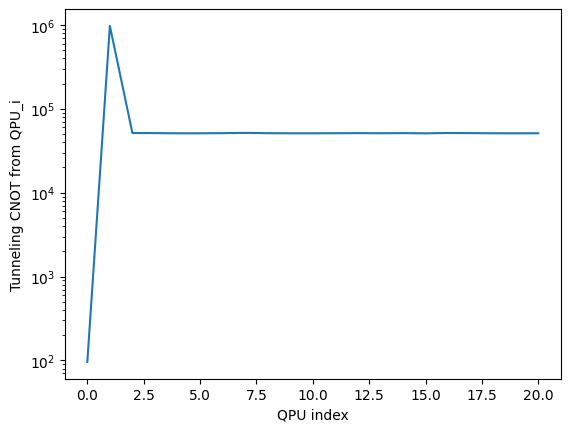

In [11]:
plt.semilogy(CNOT_count)
plt.xlabel("QPU index")
plt.ylabel("Tunneling CNOT from QPU_i")

In [12]:
T_count = np.zeros(21)
for i in range(len(QPU_lst)):
    cur_QPU = QPU_lst[i]
    count = cur_QPU.count_T()
    T_count[i] = count
print(T_count)


[ 120. 4368.  400.  400.  400.  400.  400.  400.  400.  400.  400.  400.
  400.  400.  400.  400.  400.  400.  400.  400.  396.]


Text(0, 0.5, 'T count from QPU_i')

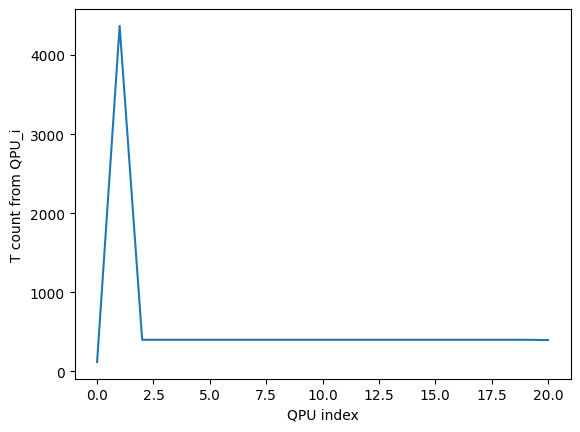

In [13]:
plt.plot(T_count)
plt.xlabel("QPU index")
plt.ylabel("T count from QPU_i")

In [14]:
# length = 5
# N = 8
# c = AbstractCircuit(0, {}, {})
# working_qubits = []
# target_qubits = []
# for i in range(N):
#     c.add_data()
# for i in range(N//2):
#     working_qubits.append(c[2*i+1])
#     target_qubits.append(c[2*i])
# table = {0:1, 1:2, 2:3, 3:4, 4:5, 5:5, 6:6, 7:7}
# # c.lookup(table, control_qubits, target_qubits)
# c.add(target_qubits, working_qubits)
# c.draw_circuit()

In [15]:
L = 5
bin1 = format(30, f'0{L}b')
bin2 = format(1, f'0{L}b')
print(find_greatest_diff_bit(bin1, bin2))
print(bin1)
print(bin2)

4
11110
00001
